In [17]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import scipy.stats as stat
import scipy as sp
import statistics

from datetime import datetime
from datetime import  date

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import hvplot as hv

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Modèle de ML
from sklearn import linear_model

# data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Outils score et evaluation de modèle
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score

# Outils optmisation de modèle
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("data_test_with_birth.csv", sep = ",")
df.head()

,DateMandatInstant,DateMandatSeason,DateMandatYear,DateMandatMonth,DateMandatWeek,MandatId,UrlMandat,DateMandat,StatutMandat,DateCompromis,BudgetMaxEuro,TypeBien,TypeProjet,SurfaceMin,NombrePieces,NombreChambres,Ville,CodePostal,Departement,Region,NombreDeBiensTrouves,NombreDeBiensPublies,NombreDeBiensSelectionnes,NombreDeBiensAVisiter,NombreDeBiensVisites,NombreDeBiensRejetes,NombreDeBiensActesOuCompromis,DatePremierePublicationDeBien,DateDernierePublicationDeBien,DelaiPremierePublicationDeBien,DatePremiereVisite,DelaiPremiereVisite,DateNaissanceClient
0,1,2,0,4,17,2,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-26,Mandat perdu,NaN,280000,Maison,Résidence principale,0,5,2,Nimes,30000,Gard,Languedoc-Roussillon,39,32,5,4,1,18,0,2012-05-21,2015-10-09,25.0,NaN,NaN,1981-09-07 00:00:00.0000000
1,1,2,0,4,17,2,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-26,Mandat perdu,NaN,280000,Maison,Résidence principale,0,5,2,Montpellier,34000,Hérault,Languedoc-Roussillon,39,32,5,4,1,18,0,2012-05-21,2015-10-09,25.0,NaN,NaN,1981-09-07 00:00:00.0000000
2,1,2,0,4,17,3,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-26,Lead perdu,NaN,300000,Appartement,Résidence principale,70,3,2,Montpellier,34000,Hérault,Languedoc-Roussillon,2,1,0,0,0,0,0,2013-03-07,2013-03-07,315.0,NaN,NaN,NaN
3,2,2,0,4,17,5,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-27,Mandat perdu,NaN,250000,Appartement,Investissement,60,3,2,Montpellier,34000,Hérault,Languedoc-Roussillon,18,17,2,0,1,11,0,2012-05-03,2014-11-18,6.0,NaN,NaN,1972-12-13 00:00:00.0000000
4,7,2,0,5,18,12,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-05-02,Lead perdu,NaN,250000,Maison,Résidence principale,80,4,3,Frontignan,34110,Hérault,Languedoc-Roussillon,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
type(df.NombrePieces)

pandas.core.series.Series

In [7]:
df.describe()

,DateMandatInstant,DateMandatSeason,DateMandatYear,DateMandatMonth,DateMandatWeek,MandatId,BudgetMaxEuro,SurfaceMin,CodePostal,NombreDeBiensTrouves,NombreDeBiensPublies,NombreDeBiensSelectionnes,NombreDeBiensAVisiter,NombreDeBiensVisites,NombreDeBiensRejetes,NombreDeBiensActesOuCompromis,DelaiPremierePublicationDeBien,DelaiPremiereVisite
count,51817.000000,51817.000000,51817.000000,51817.000000,51817.000000,51817.000000,5.181700e+04,51817.000000,51817.000000,51817.000000,51817.000000,51817.000000,51817.000000,51817.000000,51817.000000,51817.000000,23422.000000,12765.000000
mean,2452.568597,2.380744,6.570643,6.043924,24.868788,53844.263697,4.191709e+05,72.379663,59809.954224,28.413552,6.650250,1.503561,0.334485,0.865372,3.897273,0.162456,29.495944,53.898237
std,684.066912,1.163469,1.912483,3.558213,15.469696,20673.090968,7.446264e+05,444.675311,26532.547702,54.356621,12.706089,3.186819,1.062821,2.120087,8.675328,0.369604,69.214681,82.605442
min,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000e+03,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,-4.000000
25%,2085.000000,1.000000,6.000000,3.000000,11.000000,40249.000000,2.150000e+05,40.000000,34280.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,16.000000
50%,2576.000000,2.000000,7.000000,6.000000,23.000000,55472.000000,3.200000e+05,60.000000,69230.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,30.000000
75%,3006.000000,4.000000,8.000000,9.000000,39.000000,72109.000000,5.000000e+05,90.000000,75018.000000,38.000000,9.000000,2.000000,0.000000,1.000000,4.000000,0.000000,26.000000,61.000000
max,3376.000000,4.000000,9.000000,12.000000,53.000000,83862.000000,1.000000e+08,100000.000000,95880.000000,1258.000000,260.000000,52.000000,25.000000,49.000000,162.000000,2.000000,1833.000000,1851.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51817 entries, 0 to 51816
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DateMandatInstant               51817 non-null  int64  
 1   DateMandatSeason                51817 non-null  int64  
 2   DateMandatYear                  51817 non-null  int64  
 3   DateMandatMonth                 51817 non-null  int64  
 4   DateMandatWeek                  51817 non-null  int64  
 5   MandatId                        51817 non-null  int64  
 6   UrlMandat                       51817 non-null  object 
 7   DateMandat                      51817 non-null  object 
 8   StatutMandat                    51817 non-null  object 
 9   DateCompromis                   6645 non-null   object 
 10  BudgetMaxEuro                   51817 non-null  int64  
 11  TypeBien                        51817 non-null  object 
 12  TypeProjet                      

In [18]:
df['DateNaissanceClient'] = pd.to_datetime(df['DateNaissanceClient'], format='%Y-%m-%d')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1521-02-01 00:00:00

<AxesSubplot:>

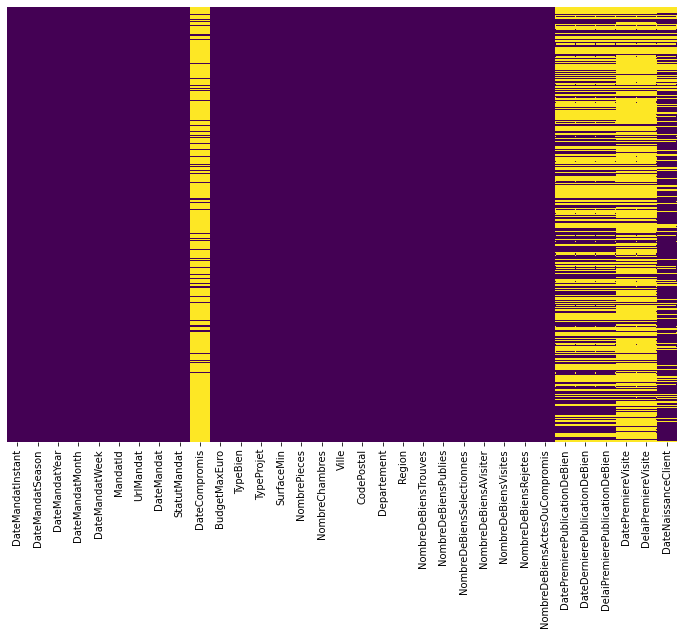

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull() , 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

In [11]:
df['DateNaissanceClient'].value_counts().sum()

38475

In [ ]:
indexNames = df[df['StatutMandat'] == 'Lead perdu'].index
df.drop(indexNames, inplace = True)

In [ ]:
indexNames = df[df['StatutMandat'] == 'Lead perdu'].index
df.drop(indexNames, inplace = True)

In [ ]:
df['StatutMandat'].replace("Mandat perdu",0 ,inplace=True)
df['StatutMandat'].replace("Entrée dans les lieux",1 ,inplace=True)
df['StatutMandat'].replace("Preparation de l'acte",1 ,inplace=True)

In [ ]:
df["StatutMandat"].value_counts(normalize = True)

In [ ]:
plot = df['StatutMandat'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='StatutMandat')

In [ ]:
plot = df['TypeBien'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='TypeBien')

In [ ]:
plot = df['TypeProjet'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='TypeProjet')

In [19]:
df['TypeBien'].replace("Appartement",0 ,inplace=True)
df['TypeBien'].replace("Maison",1 ,inplace=True)
df['TypeBien'].replace("Maison ou appartement",2 ,inplace=True)
df['TypeBien'].replace("Immeuble",3 ,inplace=True)
df['TypeBien'].replace("Studio",4 ,inplace=True)
df['TypeBien'].replace("Terrain",5 ,inplace=True)
df['TypeBien'].replace("Local",6 ,inplace=True)
df['TypeBien'].replace("Autre",7 ,inplace=True)

df['TypeProjet'].replace("Résidence principale",0 ,inplace=True)
df['TypeProjet'].replace("Investissement",1 ,inplace=True)
df['TypeProjet'].replace("Résidence secondaire",2 ,inplace=True)

df["NombreChambres"].replace("6+", 6, inplace = True)
df["NombreChambres"] = df["NombreChambres"].astype(int)

df["NombrePieces"].replace("6+", 6, inplace = True)
df["NombrePieces"] = df["NombrePieces"].astype(int)

In [ ]:
plt.figure(figsize = (25,15))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51817 entries, 0 to 51816
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DateMandatInstant               51817 non-null  int64  
 1   DateMandatSeason                51817 non-null  int64  
 2   DateMandatYear                  51817 non-null  int64  
 3   DateMandatMonth                 51817 non-null  int64  
 4   DateMandatWeek                  51817 non-null  int64  
 5   MandatId                        51817 non-null  int64  
 6   UrlMandat                       51817 non-null  object 
 7   DateMandat                      51817 non-null  object 
 8   StatutMandat                    51817 non-null  object 
 9   DateCompromis                   6645 non-null   object 
 10  BudgetMaxEuro                   51817 non-null  int64  
 11  TypeBien                        51817 non-null  int64  
 12  TypeProjet                      

In [21]:
df['DateMandat'] = pd.to_datetime(df['DateMandat'])
df.head()

,DateMandatInstant,DateMandatSeason,DateMandatYear,DateMandatMonth,DateMandatWeek,MandatId,UrlMandat,DateMandat,StatutMandat,DateCompromis,BudgetMaxEuro,TypeBien,TypeProjet,SurfaceMin,NombrePieces,NombreChambres,Ville,CodePostal,Departement,Region,NombreDeBiensTrouves,NombreDeBiensPublies,NombreDeBiensSelectionnes,NombreDeBiensAVisiter,NombreDeBiensVisites,NombreDeBiensRejetes,NombreDeBiensActesOuCompromis,DatePremierePublicationDeBien,DateDernierePublicationDeBien,DelaiPremierePublicationDeBien,DatePremiereVisite,DelaiPremiereVisite,DateNaissanceClient
0,1,2,0,4,17,2,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-26,Mandat perdu,NaN,280000,1,0,0,5,2,Nimes,30000,Gard,Languedoc-Roussillon,39,32,5,4,1,18,0,2012-05-21,2015-10-09,25.0,NaN,NaN,1981-09-07 00:00:00.0000000
1,1,2,0,4,17,2,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-26,Mandat perdu,NaN,280000,1,0,0,5,2,Montpellier,34000,Hérault,Languedoc-Roussillon,39,32,5,4,1,18,0,2012-05-21,2015-10-09,25.0,NaN,NaN,1981-09-07 00:00:00.0000000
2,1,2,0,4,17,3,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-26,Lead perdu,NaN,300000,0,0,70,3,2,Montpellier,34000,Hérault,Languedoc-Roussillon,2,1,0,0,0,0,0,2013-03-07,2013-03-07,315.0,NaN,NaN,NaN
3,2,2,0,4,17,5,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-27,Mandat perdu,NaN,250000,0,1,60,3,2,Montpellier,34000,Hérault,Languedoc-Roussillon,18,17,2,0,1,11,0,2012-05-03,2014-11-18,6.0,NaN,NaN,1972-12-13 00:00:00.0000000
4,7,2,0,5,18,12,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-05-02,Lead perdu,NaN,250000,1,0,80,4,3,Frontignan,34110,Hérault,Languedoc-Roussillon,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
from datetime import datetime, date 

In [23]:
df['DateNaissanceClient'] = pd.to_datetime(df['DateNaissanceClient'], errors = 'coerce')


In [ ]:
df.info()

In [ ]:
pd.Timestamp.min

In [ ]:
pd.Timestamp.max

In [ ]:
df[df['DateNaissanceClient'].isna()]

In [ ]:
#df['DateNaissanceClient'] = pd.to_datetime(df['DateNaissanceClient'])

In [ ]:
df['DateNaissanceClient'].value_counts()

In [ ]:
df.info()

In [ ]:
df["AgeClientJR"] = df["DateMandat"] - df["DateNaissanceClient"]

In [ ]:
df["AgeClientYR"] = df["AgeClientJR"] / (365.25)

In [ ]:
df['AgeClientYR'] = pd.to_numeric(df['AgeClientYR'].dt.days, downcast='integer')


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['AgeClientYR'] = df['AgeClientYR'].fillna(0)


In [ ]:
df['AgeClientYR'] =df['AgeClientYR'].astype(int)

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['AgeClientYR'])

In [ ]:
df.head()

In [ ]:
df["CodePostal"].value_counts().unique()

In [ ]:
df["NombreBienLoc"] = df.groupby('CodePostal')['NombreDeBiensActesOuCompromis'].sum()

In [ ]:
df. groupby ( 'CodePostal' ).count

In [ ]:
df.groupby('manager')[['ventes','clients']].sum()


In [ ]:
#df["NombreBienLoc"]

#je veux le nombre de bien vendu/ acté par localisation

df.loc[df['NombreBienLoc'] == 3]

In [ ]:
df['NombreBienLoc'].max()

In [ ]:
df.loc[df['NombreBienLoc'] == 101.0]

In [ ]:
df.loc[df["CodePostal"] == 69600]

In [ ]:
df['NombreBienLoc'].value_counts()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull() , 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')